<a href="https://colab.research.google.com/github/udaykiranreddykondreddy/Code-for-learn-machinelearning/blob/master/hyperparameter_tuning/HyperParameter_tuning-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://drive.google.com/uc?export=view&id=1xZggtEjnrMp9QBm_4q5RJIfJyfSoSJ9p" height="150" align="left"/>
<h1>&nbsp;<a href="https://instagram.com/learn.machinelearning">Learn.MachineLearning</a></h1>
<h2>&nbsp;Hyperparameter tuning</h2>
<h2>&nbsp;Grid Search, Random Search</h2>

In [0]:
%matplotlib inline
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import numpy as np
from scipy.stats import uniform
import time

**Two types of learnable entities**
- Parameters
- HyperParameters

```
Lets understad these parameters with an example.
```

**Logistic Regression as an example:**
- Equation \begin{equation}
Y = w*X + b \end{equation}
- Sigmoid \begin{equation} H(Y) = \frac {1}{1+e^{{-(w*X + b)}}} \end{equation}
- Loss function \begin{equation} loss = \sum_{i=1}^{n} [-y^{(i)}log(H(Y)^{(i)}) - (1-Y^{(i)})*(log(1-H(Y)^{(i)})  \end{equation}
- Output will be 0 or 1

- If you add a L2 Regularization term to that equation it will be as follows \begin{equation} loss = \sum_{i=1}^{n} [-y^{(i)}log(H(Y)^{(i)}) - (1-Y^{(i)})*(log(1-H(Y)^{(i)}) + \frac {\lambda}{2} * ||w||^2 \end{equation}



**Different types of tuning algorithms** 
- Manual
- Grid search
- Random Search 
- Bayesian Search 
- Evolutionary
- Gradient-based

**<h2> Grid Search </h2>**
- Good choice for 2-3 Parameters.
- We define a set of values for each parameter to explore.
- It will try every combination of values.
- In the end, we choose the combination which has the smalles error.

In [0]:
# Load data(We will be using breast cancer dataset)
data = datasets.load_breast_cancer()
x_data, y_data = data["data"], data["target"]

In [0]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=35)

In [0]:
# To see the Hyperparameters
?LogisticRegression()

In [49]:
# Train a model with logistic regression using Grid search
start_time = time.time()
clf = LogisticRegression(solver="liblinear")
gridsearch_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5], 'max_iter': [150,200,250,300,350]}
grid_clf_acc = GridSearchCV(clf, param_grid = gridsearch_values,scoring = 'f1', verbose=0, n_jobs=-1, cv = 5)
grid_clf_acc.fit(X_train, y_train)
end_time = time.time()
print("Total time taken ",end_time-start_time)

Total time taken  13.050159931182861


In [50]:
# Optimal paramters 
grid_clf_acc.best_params_

{'C': 1, 'max_iter': 200, 'penalty': 'l1'}

In [51]:
# Train athe model with best parameters
clf = LogisticRegression(solver="liblinear", C=1, max_iter=200, penalty='l1')
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted_values = clf.predict(X_test)

In [53]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,predicted_values)))
print('Precision Score : ' + str(precision_score(y_test,predicted_values)))
print('Recall Score : ' + str(recall_score(y_test,predicted_values)))
print('F1 Score : ' + str(f1_score(y_test,predicted_values)))

Accuracy Score : 0.9532163742690059
Precision Score : 0.9482758620689655
Recall Score : 0.9821428571428571
F1 Score : 0.9649122807017544


In [54]:
grid_clf_acc.best_score_

0.9716338899196042

In [55]:
X,Y,Z = [],[],[]
for i, j in zip(grid_clf_acc.cv_results_["params"],grid_clf_acc.cv_results_["mean_test_score"]):
  X.append(i["C"])
  Y.append(i["max_iter"])
  Z.append(j)
  print(i,j)

{'C': 0.001, 'max_iter': 150, 'penalty': 'l1'} 0.9326298768640061
{'C': 0.001, 'max_iter': 150, 'penalty': 'l2'} 0.9420136054421769
{'C': 0.001, 'max_iter': 200, 'penalty': 'l1'} 0.9326298768640061
{'C': 0.001, 'max_iter': 200, 'penalty': 'l2'} 0.9420136054421769
{'C': 0.001, 'max_iter': 250, 'penalty': 'l1'} 0.9326298768640061
{'C': 0.001, 'max_iter': 250, 'penalty': 'l2'} 0.9420136054421769
{'C': 0.001, 'max_iter': 300, 'penalty': 'l1'} 0.9326298768640061
{'C': 0.001, 'max_iter': 300, 'penalty': 'l2'} 0.9420136054421769
{'C': 0.001, 'max_iter': 350, 'penalty': 'l1'} 0.9326298768640061
{'C': 0.001, 'max_iter': 350, 'penalty': 'l2'} 0.9420136054421769
{'C': 0.009, 'max_iter': 150, 'penalty': 'l1'} 0.9424168942457047
{'C': 0.009, 'max_iter': 150, 'penalty': 'l2'} 0.9436826407106231
{'C': 0.009, 'max_iter': 200, 'penalty': 'l1'} 0.9424168942457047
{'C': 0.009, 'max_iter': 200, 'penalty': 'l2'} 0.9436826407106231
{'C': 0.009, 'max_iter': 250, 'penalty': 'l1'} 0.9424168942457047
{'C': 0.00

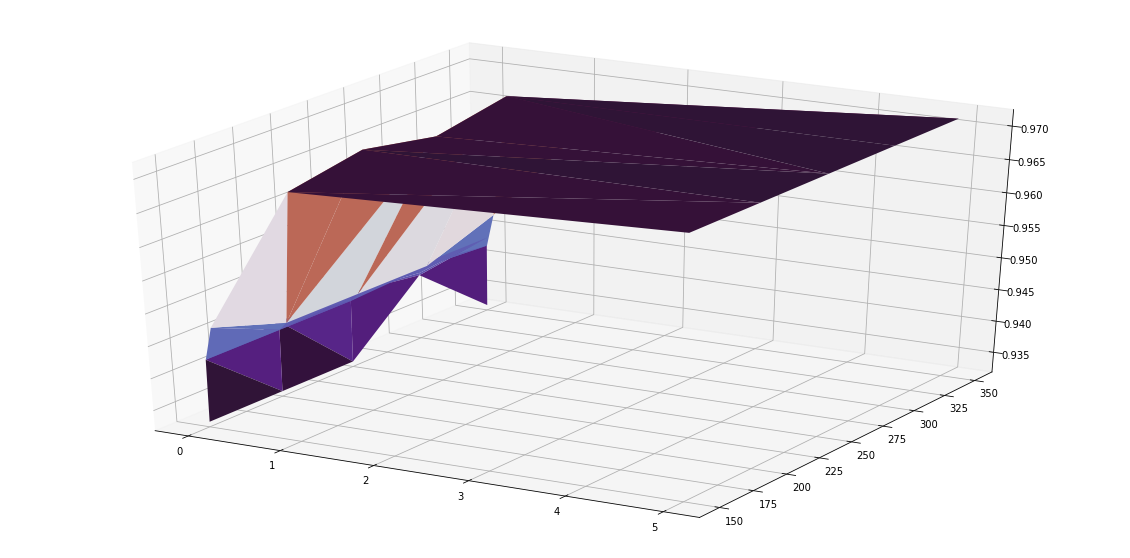

In [56]:
X,Y,Z = np.array(X),np.array(Y),np.array(Z)
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X, Y, Z, cmap='twilight_shifted')
fig.show()

**Problems of Grid search**
- Time complexity
- Dive Deeper 
- Doesn't dependent on the previous values


**<h2>Random Search</h2>**

- Works better than Grid search 
- Randomly selects the combination of parameters.
- It is good at testing a wide range of values.
- Reaches a very good combination very fast.
- Randomly samples the search space and evaluates sets from a specified probability distribution.

In [57]:
# Train a model with logistic regression using Random search
start_time = time.time()
clf = LogisticRegression(solver="liblinear")
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'], max_iter=[150,200,150,300,350])
random_clf_acc = RandomizedSearchCV(clf, distributions,scoring = 'f1', verbose=0, n_jobs=-1, cv = 5)
random_clf_acc.fit(X_train, y_train)
end_time = time.time()
print("Total time taken ",end_time-start_time)

Total time taken  5.350224494934082


In [58]:
# Optimal paramters 
random_clf_acc.best_params_

{'C': 3.986327584763332, 'max_iter': 350, 'penalty': 'l1'}

In [59]:
# Train athe model with best parameters
clf = LogisticRegression(solver="liblinear", C=3.986327584763332, max_iter=350, penalty='l1')
clf.fit(X_train, y_train)

LogisticRegression(C=3.986327584763332, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=350, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted_values = clf.predict(X_test)

In [61]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,predicted_values)))
print('Precision Score : ' + str(precision_score(y_test,predicted_values)))
print('Recall Score : ' + str(recall_score(y_test,predicted_values)))
print('F1 Score : ' + str(f1_score(y_test,predicted_values)))

Accuracy Score : 0.9532163742690059
Precision Score : 0.9482758620689655
Recall Score : 0.9821428571428571
F1 Score : 0.9649122807017544


In [39]:
random_clf_acc.best_score_

0.9677134228886807

In [62]:
X,Y,Z = [],[],[]
for i, j in zip(random_clf_acc.cv_results_["params"],random_clf_acc.cv_results_["mean_test_score"]):
  X.append(i["C"])
  Y.append(i["max_iter"])
  Z.append(j)
  print(i,j)

{'C': 2.0631510189806868, 'max_iter': 350, 'penalty': 'l2'} 0.9676734693877551
{'C': 3.35278042531985, 'max_iter': 150, 'penalty': 'l1'} 0.9715934858792
{'C': 2.7103573710057676, 'max_iter': 300, 'penalty': 'l2'} 0.9677134228886807
{'C': 0.36189105722381276, 'max_iter': 150, 'penalty': 'l2'} 0.9553848420819359
{'C': 1.5670019417987162, 'max_iter': 300, 'penalty': 'l1'} 0.9716338899196042
{'C': 0.5050852270626285, 'max_iter': 150, 'penalty': 'l2'} 0.9553848420819359
{'C': 1.252944590767687, 'max_iter': 200, 'penalty': 'l1'} 0.9716338899196042
{'C': 1.012367643513389, 'max_iter': 300, 'penalty': 'l2'} 0.963592661306947
{'C': 1.1662145577496768, 'max_iter': 200, 'penalty': 'l2'} 0.9656532673675532
{'C': 3.986327584763332, 'max_iter': 350, 'penalty': 'l1'} 0.9735312306740876


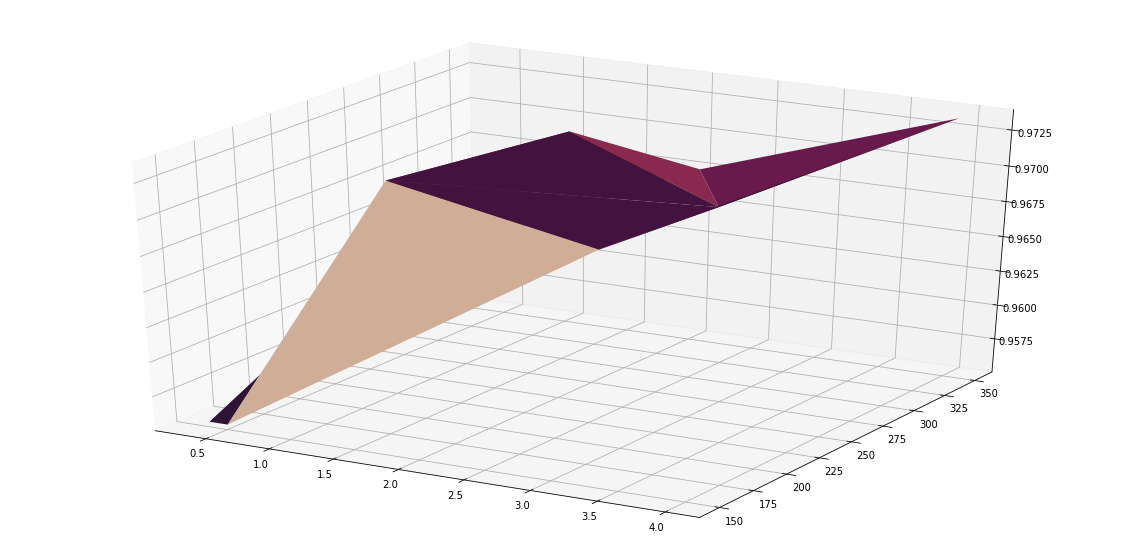

In [63]:
X,Y,Z = np.array(X),np.array(Y),np.array(Z)
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X, Y, Z, cmap='twilight_shifted')
fig.show()

<img src="http://drive.google.com/uc?export=view&id=1oU4iFcgqdhLTgDcTHMysKIYaIxMfgu50" height="200"/>

**Problems of Grid and Random search**
- Each new guess is independent of the previous run.
- The problem is that it doesn’t guarantee to give the best parameters combination.

**<h1> Hybrid Search (Grid+Random)</h1>**
- Use random search with a large hyperparameter set
- Use the results of random search to build a closed hyperparameter set around the best performing hyperparameter values.
- Run grid search on the closed hyperparameter grid.
- Repeat grid search on more closed grids until maximum computational/time budget is exceeded.